In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
# Define column names based on dataset documentation
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Read the dataset from a .data file
data = pd.read_csv('processed.cleveland.data', header=None, names=column_names)

In [16]:
# Convert all values other than 0 and 1 to 1 in the 'target' column
data['target'] = data['target'].apply(lambda x: 1 if x != 0 and x != 1 else x)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<Figure size 5000x5000 with 0 Axes>

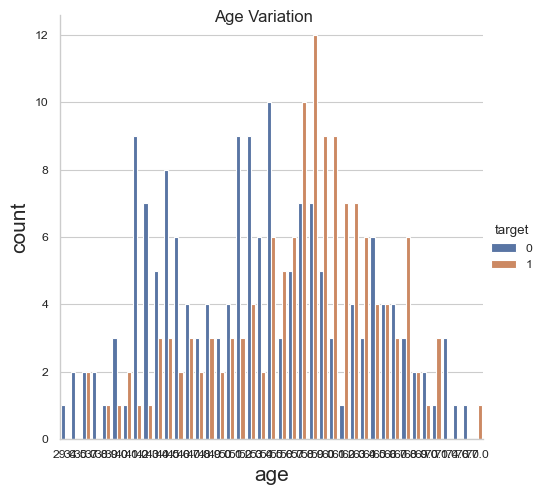

In [19]:
sns.set_context("paper", font_scale=1, rc={"font.size": 10, "axes.titlesize": 20, "axes.labelsize": 15})

plt.figure(figsize=(50, 50))
plot = sns.catplot(kind='count', data=data, x='age', hue='target', order=data['age'].sort_values().unique())
plot.fig.suptitle('Age Variation')
plt.show()

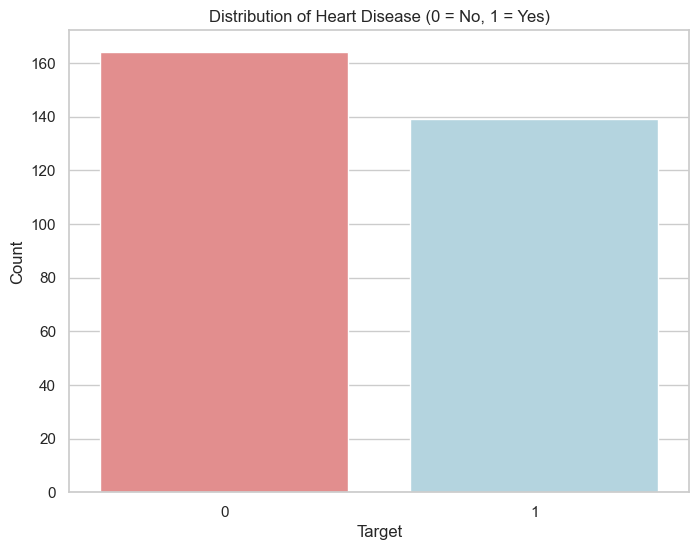

In [20]:
plt.figure(figsize=(8, 6))

sns.set(style="whitegrid")
sns.countplot(x='target', data=data, palette=['lightcoral', 'lightblue'], dodge=True)

plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_30512\1506691666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


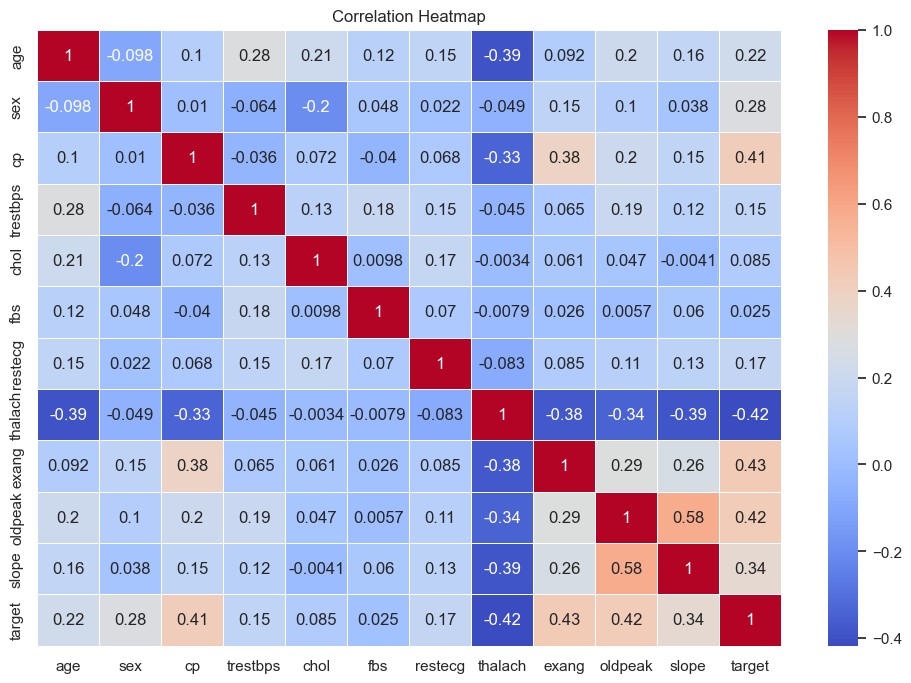

In [21]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

In [22]:
from ydata_profiling import ProfileReport

eda_data = ProfileReport(data)
eda_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
data.replace('?', np.nan, inplace=True)
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

ca_mean = data['ca'].mean()
thal_mode = data['thal'].mode()[0]

# Fill missing values with the mean and mode
data['ca'].fillna(ca_mean, inplace=True)
data['thal'].fillna(thal_mode, inplace=True)


In [24]:
scaler = StandardScaler()
columns_to_standardize = ['trestbps', 'chol', 'thalach']
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,1.4,1.0,0.0,3.0,0


In [26]:
X = data.drop('target', axis=1)  #Features
y = data['target']  #Target

# Split the dataset into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [27]:
# Decision Trees with 'entropy' and 'gini_index' 
entropy = DecisionTreeClassifier(criterion='entropy')
gini = DecisionTreeClassifier(criterion='gini')

entropy.fit(X_train, y_train)
gini.fit(X_train, y_train)

# Accuracy scores for both models
accuracy_entropy = accuracy_score(y_test, entropy.predict(X_test))
accuracy_gini = accuracy_score(y_test, gini.predict(X_test))

print(f"Accuracy with 'entropy' is {accuracy_entropy:}")
print(f"Accuracy with 'gini' is {accuracy_gini:}")

# Choosing the best_criterion
best_criteria = ''
if(accuracy_entropy > accuracy_gini):
    best_criteria = 'entropy'
else:
    best_criteria = 'gini'

print(f"The best criteria is '{best_criteria}'")

Accuracy with 'entropy' is 0.7868852459016393
Accuracy with 'gini' is 0.7540983606557377
The best criteria is 'entropy'


In [28]:
dt_classify = DecisionTreeClassifier(criterion=best_criteria)

# Defining the hyperparameters
parameters = {
    'min_samples_split': [2, 5, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 50, 100],  
    'max_features': ['sqrt', None, 0.1, 'log2', 0.2, 'auto', 0.3]  
}

# GridSearchCV 
grid_search = GridSearchCV(estimator=dt_classify, param_grid=parameters, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

# Evaluate the model with the best hyperparameters on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", test_accuracy)

Best Hyperparameters: {'max_features': None, 'min_samples_split': 19}
Accuracy with Best Hyperparameters: 0.8524590163934426


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
85 fits failed out of a total of 595.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 638

In [29]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters 
param_grid_rf = {
    'n_estimators': [50, 60, 70, 75, 80],  
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7 ,10], 
    'min_samples_split': [1, 2, 3, 4, 5, 6]
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Evaluate the model with the best hyperparameters on the test data
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Best Hyperparameters for Random Forest:", test_accuracy_rf)

# Generate a classification report 
classification_rep = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 60}
Accuracy with Best Hyperparameters for Random Forest: 0.9016393442622951
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 